In [1]:
#import some of the necessary libraries and packages to start
#load the csv file and rename
#use info command to get basic info on the loaded dataset

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

filename='medical_clean.csv'
mrd=pd.read_csv(filename)
mrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [2]:
#check for duplicate values
#check for null values

mrd.duplicated()
print(mrd.duplicated().value_counts())

mrd.isnull().sum()

False    10000
Name: count, dtype: int64


CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [3]:
#no duplicates or nulls exist
#now to identify outliers present in the dataset
#will do this using zscores for continuous variables

mrd['zscore_Age']=stats.zscore(mrd['Age'])
sum((mrd.zscore_Age<-3) | (mrd.zscore_Age>3))

0

In [4]:
#no outliers present, continue to next variable

mrd['zscore_VitD_levels']=stats.zscore(mrd['VitD_levels'])
sum((mrd.zscore_VitD_levels<-3) | (mrd.zscore_VitD_levels>3))

24

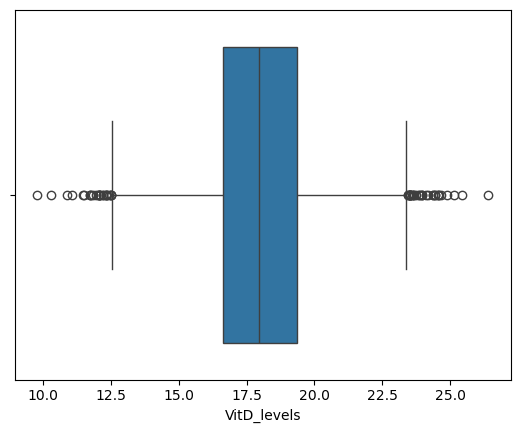

In [5]:
#visualize outliers using boxplot

C_out=sb.boxplot(x='VitD_levels', data=mrd)

In [6]:
mrd['zscore_Doc_visits']=stats.zscore(mrd['Doc_visits'])
sum((mrd.zscore_Doc_visits<-3) | (mrd.zscore_Doc_visits>3))

8

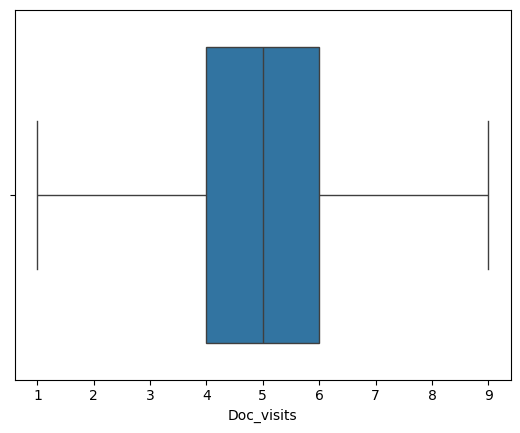

In [7]:
C_out=sb.boxplot(x='Doc_visits', data=mrd)

In [8]:
mrd['zscore_Initial_days']=stats.zscore(mrd['Initial_days'])
sum((mrd.zscore_Initial_days<-3) | (mrd.zscore_Initial_days>3))

0

In [9]:
#no outliers present with this variable, end of continuous variables
#all outliers will be retained as they are 'expected'
#identify all continuous variables being used
#check for multicollinearity

cont_vars=['Age', 'VitD_levels', 'Doc_visits', 'Initial_days']
mrd_cont=mrd[cont_vars]

mrd_cont.corr()

,Age,VitD_levels,Doc_visits,Initial_days
Age,1.000000,0.010315,0.006898,0.016264
VitD_levels,0.010315,1.000000,0.010210,-0.003642
Doc_visits,0.006898,0.010210,1.000000,-0.006754
Initial_days,0.016264,-0.003642,-0.006754,1.000000


In [10]:
#now we re-express categorical variables using boolean mapping

bool_mapping = {"Yes":1, "No":0}
mrd["HighBlood"]=mrd["HighBlood"].map(bool_mapping)
mrd["Stroke"]=mrd["Stroke"].map(bool_mapping)
mrd["Overweight"]=mrd["Overweight"].map(bool_mapping)
mrd["Arthritis"]=mrd["Arthritis"].map(bool_mapping)
mrd["Diabetes"]=mrd["Diabetes"].map(bool_mapping)
mrd["Hyperlipidemia"]=mrd["Hyperlipidemia"].map(bool_mapping)
mrd["BackPain"]=mrd["BackPain"].map(bool_mapping)
mrd["Anxiety"]=mrd["Anxiety"].map(bool_mapping)
mrd["Allergic_rhinitis"]=mrd["Allergic_rhinitis"].map(bool_mapping)
mrd["Reflux_esophagitis"]=mrd["Reflux_esophagitis"].map(bool_mapping)
mrd["Asthma"]=mrd["Asthma"].map(bool_mapping)
mrd["ReAdmis"]=mrd["ReAdmis"].map(bool_mapping)

In [11]:
#converting categorical variables to type float
#checking collinearity for categorical variables

mrd['HighBlood']=mrd['HighBlood'].astype(float)
mrd['Stroke']=mrd["Stroke"].astype(float)
mrd["Overweight"]=mrd["Overweight"].astype(float)
mrd["Arthritis"]=mrd["Arthritis"].astype(float)
mrd["Diabetes"]=mrd["Diabetes"].astype(float)
mrd["Hyperlipidemia"]=mrd["Hyperlipidemia"].astype(float)
mrd["BackPain"]=mrd["BackPain"].astype(float)
mrd["Anxiety"]=mrd["Anxiety"].astype(float)
mrd["Allergic_rhinitis"]=mrd["Allergic_rhinitis"].astype(float)
mrd["Reflux_esophagitis"]=mrd["Reflux_esophagitis"].astype(float)
mrd["Asthma"]=mrd["Asthma"].astype(float)
mrd["ReAdmis"]=mrd["ReAdmis"].astype(float)

cat_vars=['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'ReAdmis']
mrd_cat=mrd[cat_vars]

mrd_cat.corr()

,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,ReAdmis
HighBlood,1.000000,0.007568,0.026231,0.007314,-0.005858,-0.009529,0.003048,0.008303,0.011709,0.001150,0.006174,0.002270
Stroke,0.007568,1.000000,-0.001011,-0.018438,0.005792,-0.014847,0.003602,-0.013801,-0.004837,-0.000054,0.002443,0.000918
Overweight,0.026231,-0.001011,1.000000,0.003954,-0.007575,-0.006102,0.010083,-0.011186,0.002819,-0.012240,0.013943,-0.008586
Arthritis,0.007314,-0.018438,0.003954,1.000000,0.009097,-0.007130,-0.018804,0.012045,0.008748,0.014894,-0.006423,0.007663
Diabetes,-0.005858,0.005792,-0.007575,0.009097,1.000000,0.011739,-0.013405,-0.002529,0.005486,-0.007816,0.016765,-0.003058
Hyperlipidemia,-0.009529,-0.014847,-0.006102,-0.007130,0.011739,1.000000,-0.000963,-0.013178,-0.009049,0.001580,-0.009106,0.004307
BackPain,0.003048,0.003602,0.010083,-0.018804,-0.013405,-0.000963,1.000000,0.009289,0.004023,0.016036,0.014261,0.013313
Anxiety,0.008303,-0.013801,-0.011186,0.012045,-0.002529,-0.013178,0.009289,1.000000,0.004368,-0.007566,0.011758,0.002406
Allergic_rhinitis,0.011709,-0.004837,0.002819,0.008748,0.005486,-0.009049,0.004023,0.004368,1.000000,-0.007731,0.004454,-0.004651
Reflux_esophagitis,0.001150,-0.000054,-0.012240,0.014894,-0.007816,0.001580,0.016036,-0.007566,-0.007731,1.000000,-0.001458,0.005422


In [12]:
#get summary statistics for dependent variable ReAdmis

mrd['ReAdmis'].value_counts()

ReAdmis
0.0    6331
1.0    3669
Name: count, dtype: int64

In [13]:
#get summary statistics for all independent variables (using both .describe() and .value_counts())

mrd['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [14]:
mrd['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [15]:
mrd['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [16]:
mrd['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [17]:
mrd['HighBlood'].value_counts()

HighBlood
0.0    5910
1.0    4090
Name: count, dtype: int64

In [18]:
mrd['Stroke'].value_counts()

Stroke
0.0    8007
1.0    1993
Name: count, dtype: int64

In [19]:
mrd['Overweight'].value_counts()

Overweight
1.0    7094
0.0    2906
Name: count, dtype: int64

In [20]:
mrd['Arthritis'].value_counts()

Arthritis
0.0    6426
1.0    3574
Name: count, dtype: int64

In [21]:
mrd['Diabetes'].value_counts()

Diabetes
0.0    7262
1.0    2738
Name: count, dtype: int64

In [22]:
mrd['Hyperlipidemia'].value_counts()

Hyperlipidemia
0.0    6628
1.0    3372
Name: count, dtype: int64

In [23]:
mrd['BackPain'].value_counts()

BackPain
0.0    5886
1.0    4114
Name: count, dtype: int64

In [24]:
mrd['Anxiety'].value_counts()

Anxiety
0.0    6785
1.0    3215
Name: count, dtype: int64

In [25]:
mrd['Allergic_rhinitis'].value_counts()

Allergic_rhinitis
0.0    6059
1.0    3941
Name: count, dtype: int64

In [26]:
mrd['Reflux_esophagitis'].value_counts()

Reflux_esophagitis
0.0    5865
1.0    4135
Name: count, dtype: int64

In [27]:
mrd['Asthma'].value_counts()

Asthma
0.0    7107
1.0    2893
Name: count, dtype: int64

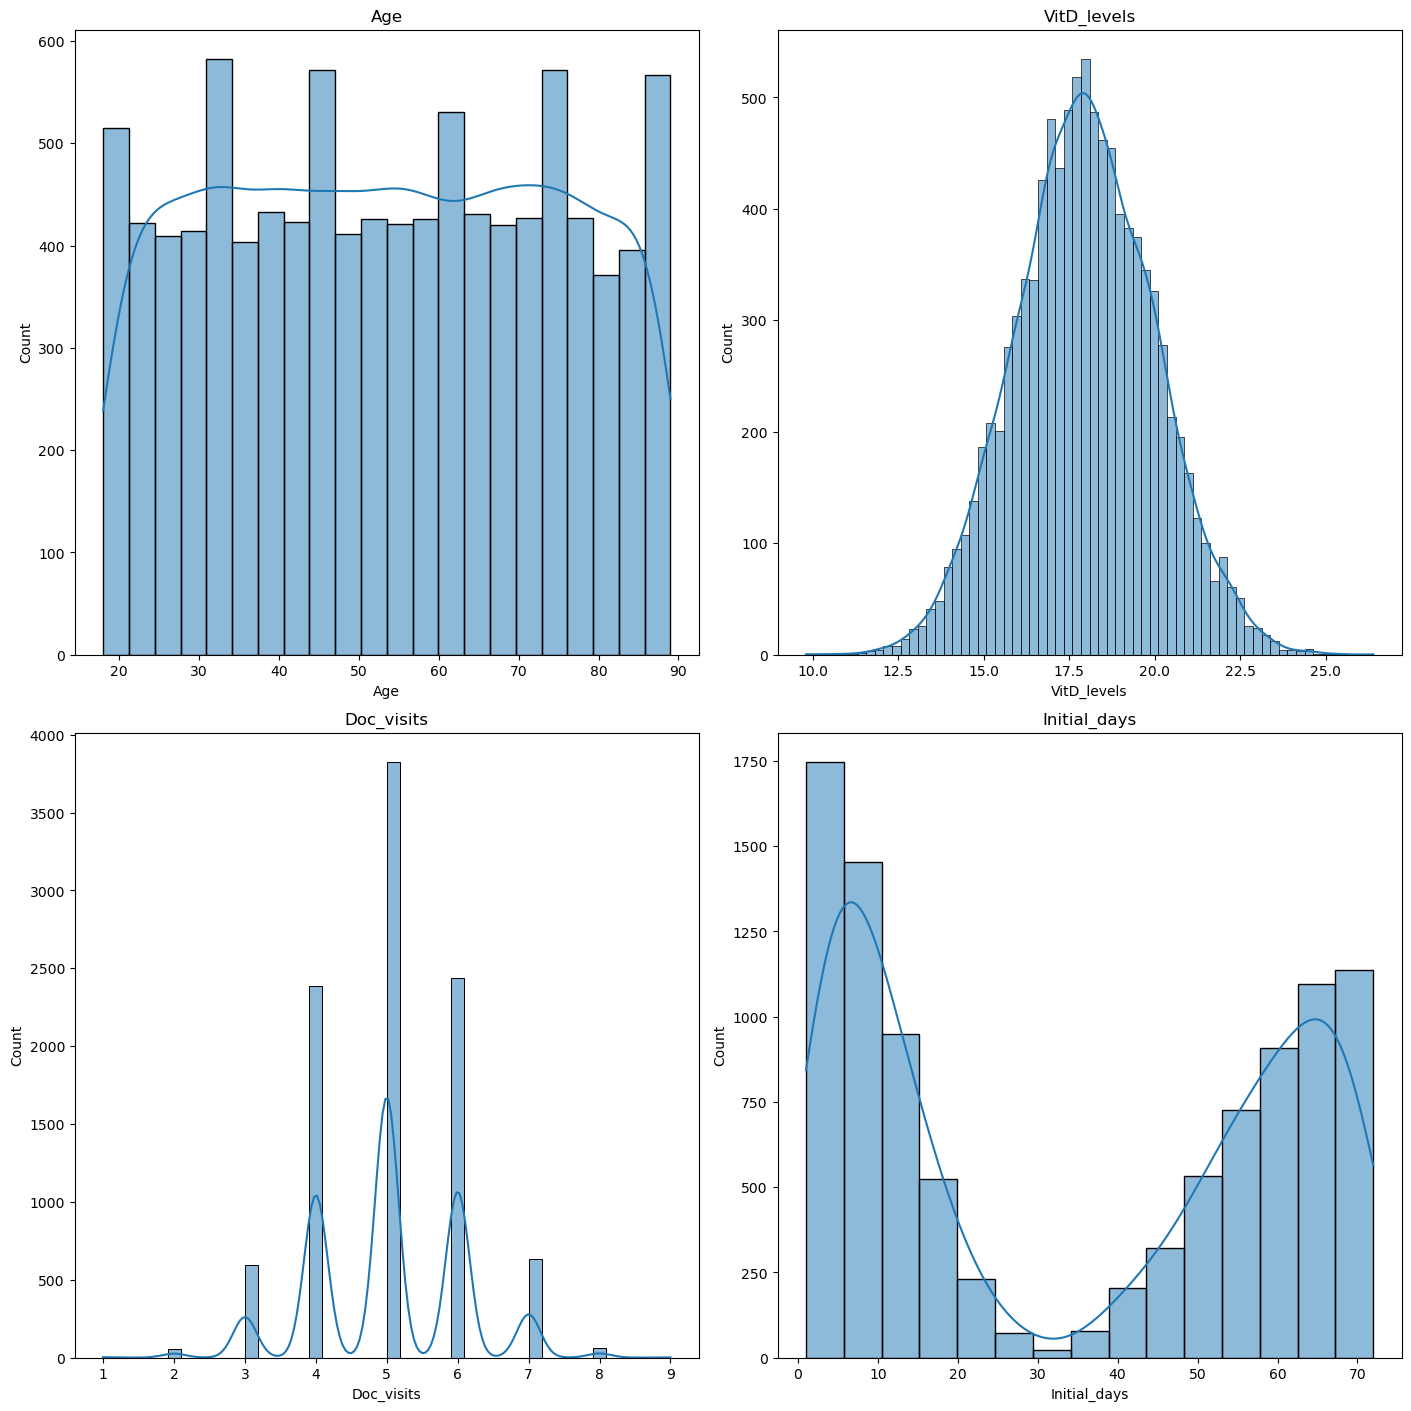

In [28]:
#creating univariate visualizations for continuous variables

fig, axes=plt.subplots(2, 2, sharex=False, sharey=False, figsize=(14,14), constrained_layout=True)

for col, ax in zip(mrd_cont.columns, axes.flat):
    sb.histplot(mrd_cont[col], ax=ax, kde=True)
    ax.set_title(col)

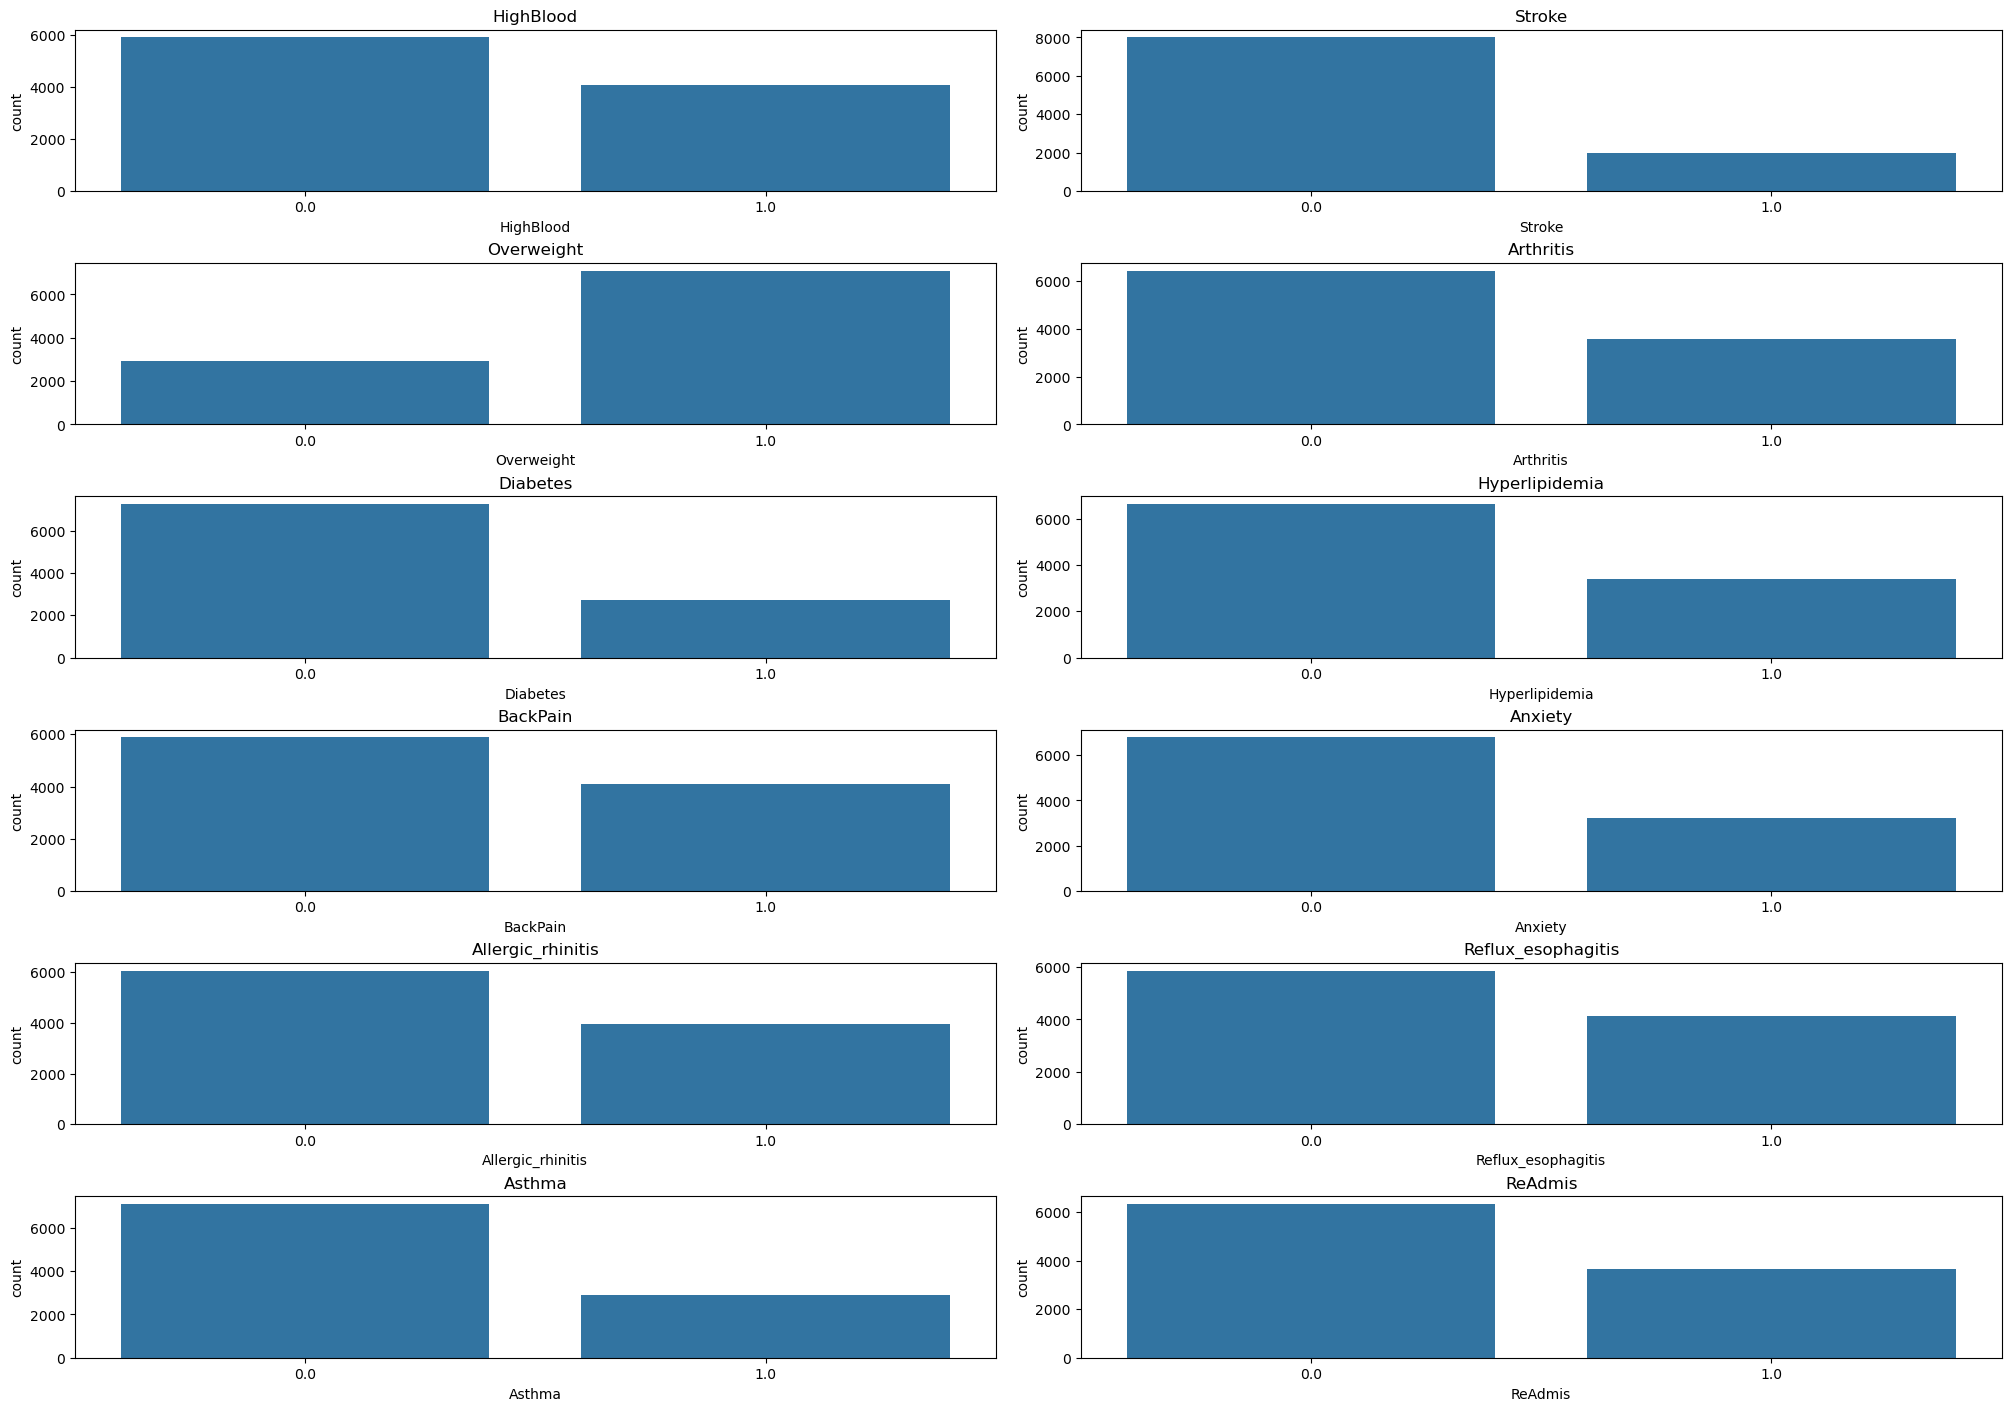

In [29]:
#now for the categorical variables
#done in largely the same manner

fig, axes=plt.subplots(6, 2, sharex=False, sharey=False, figsize=(20,14), constrained_layout=True)

for col, ax in zip(mrd_cat.columns, axes.flat):
    sb.countplot(data=mrd_cat, x=col, ax=ax)
    ax.set_title(col)

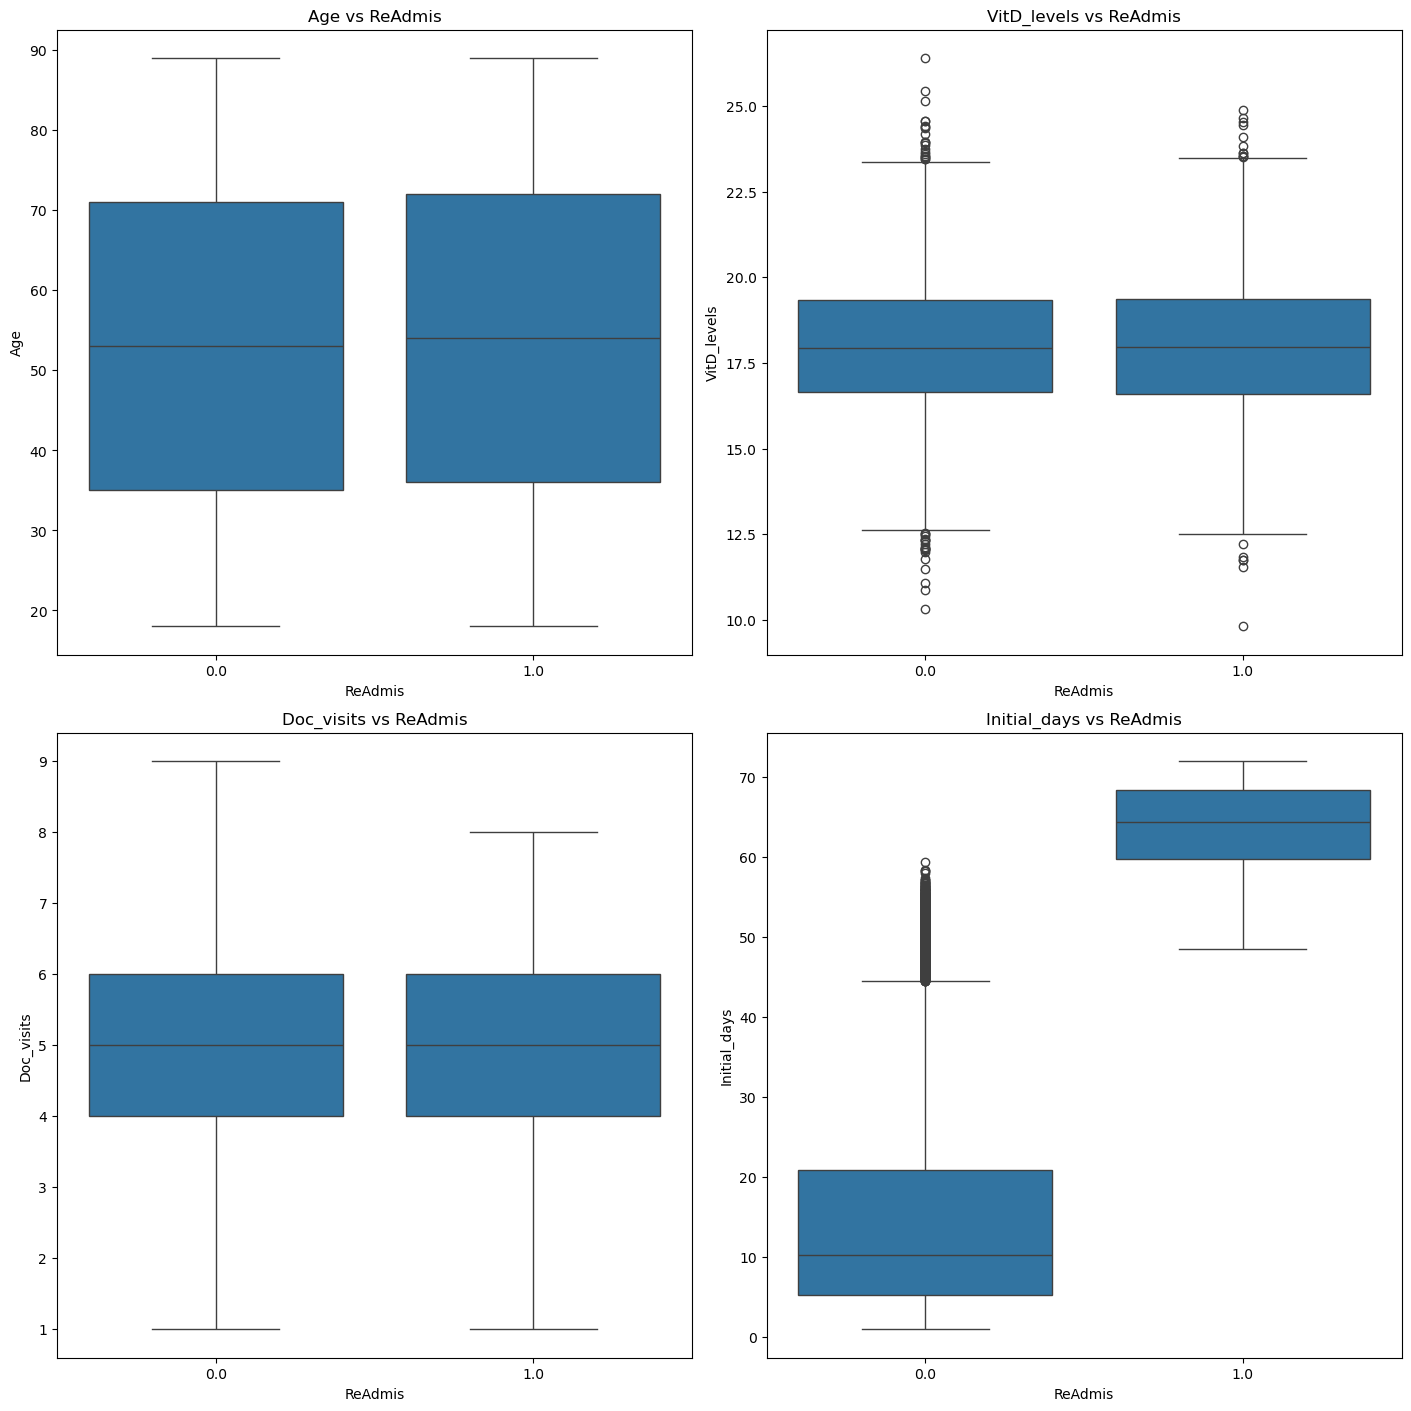

In [30]:
#now onto the bivariate visualizations
#again starting with continuous variables
#plotted against the dependent variable ReAdmis

fig, axes = plt.subplots(2, 2, figsize=(14, 14), constrained_layout=True)

for col, ax in zip(mrd_cont.columns, axes.flat):
    sb.boxplot(data=mrd_cont.assign(ReAdmis=mrd["ReAdmis"]), x="ReAdmis", y=col, ax=ax)
    ax.set_title(f"{col} vs ReAdmis")
plt.show()

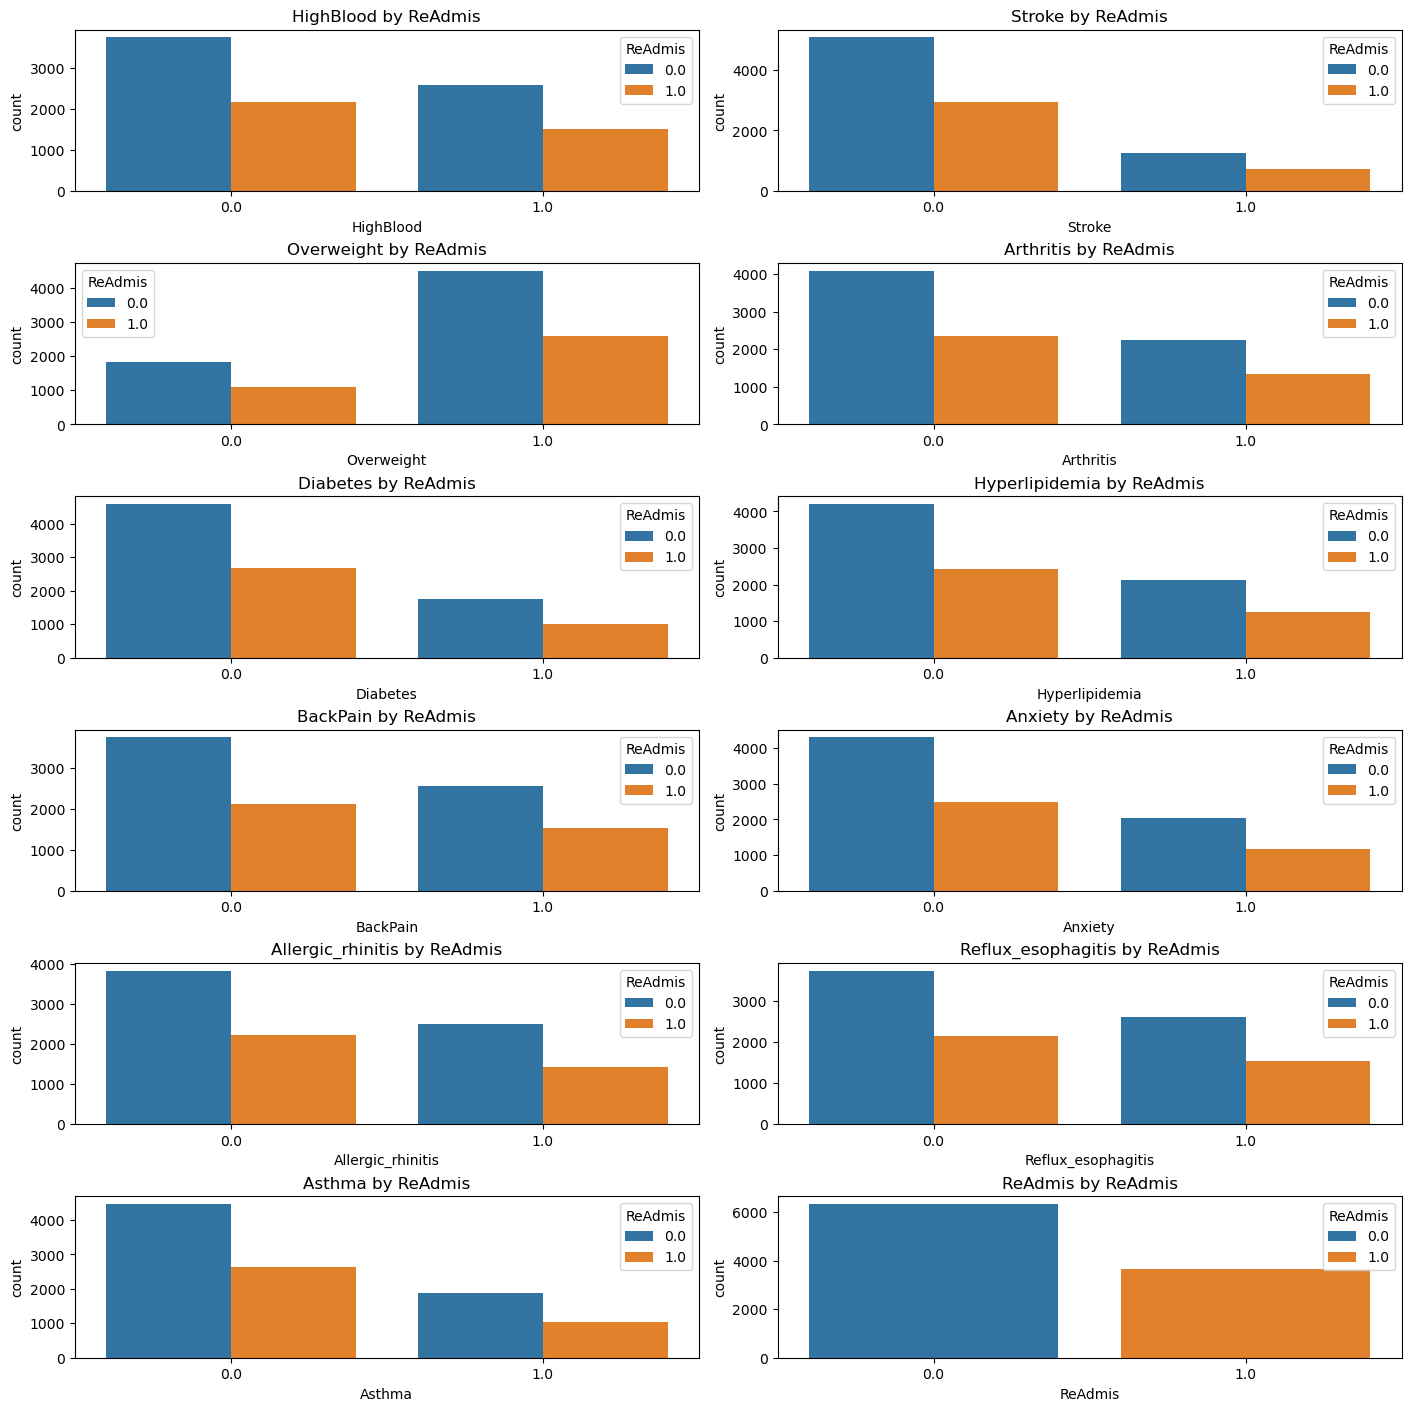

In [31]:
#now for the categorical variables

fig, axes = plt.subplots(6, 2, figsize=(14, 14), constrained_layout=True)

for col, ax in zip(mrd_cat.columns, axes.flat): 
    sb.countplot(data=mrd.assign(ReAdmis=mrd["ReAdmis"]), x=col, hue="ReAdmis", ax=ax)
    ax.set_title(f"{col} by ReAdmis")
    ax.legend(title="ReAdmis")

plt.show()

In [32]:
#dropping columns not necessary for our purposes
#also dropping z score columns created earlier
#sending prepared dataset to its own csv file, which is attached

mrd=mrd.drop(columns=['City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Children', 'Job', 'Income', 'Marital', 'Gender', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'Complication_risk', 'Services', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
mrd=mrd.drop(columns=['zscore_Age', 'zscore_VitD_levels', 'zscore_Doc_visits', 'zscore_Initial_days'])

mrd.to_csv('Medical_clean2.csv')

In [33]:
#import statsmodels to run regression model
#set dependent and independent variables for the model

import statsmodels.api as sm

y = mrd['ReAdmis']
x = mrd[['Age', 'Doc_visits', 'VitD_levels', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model = sm.Logit(y, x)
m_results = model.fit()
print(m_results.summary())

model_full=m_results

Optimization terminated successfully.
         Current function value: 0.042597
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.9352
Time:                        18:39:10   Log-Likelihood:                -425.97
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0003      0.004     -0.067      0.947      -0.009       0.008
Doc_

In [34]:
#due to multicollinearity issues, utilize VIF to identify which variables to drop
#import VIF
#will eliminate variables whose VIF > 5, one at a time

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = mrd[['Age', 'Doc_visits', 'VitD_levels', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

               feature        VIF
0                  Age   7.354274
1           Doc_visits  19.540617
2          VitD_levels  27.030349
3         Initial_days   2.679692
4            HighBlood   1.687788
5               Stroke   1.248136
6           Overweight   3.386330
7            Arthritis   1.552681
8             Diabetes   1.372481
9       Hyperlipidemia   1.499199
10            BackPain   1.694004
11             Anxiety   1.471061
12   Allergic_rhinitis   1.642761
13  Reflux_esophagitis   1.692334
14              Asthma   1.404693


In [35]:
#repeat process after removing VitD_levels

X = mrd[['Age', 'Doc_visits', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

               feature        VIF
0                  Age   6.508046
1           Doc_visits  10.176453
2         Initial_days   2.605850
3            HighBlood   1.672208
4               Stroke   1.242057
5           Overweight   3.244456
6            Arthritis   1.540054
7             Diabetes   1.368257
8       Hyperlipidemia   1.481788
9             BackPain   1.682204
10             Anxiety   1.458554
11   Allergic_rhinitis   1.628440
12  Reflux_esophagitis   1.671886
13              Asthma   1.393226


In [36]:
#repeat process after removing Doc_visits

X = mrd[['Age', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

               feature       VIF
0                  Age  4.758505
1         Initial_days  2.464810
2            HighBlood  1.635994
3               Stroke  1.231968
4           Overweight  2.932875
5            Arthritis  1.514899
6             Diabetes  1.347815
7       Hyperlipidemia  1.459561
8             BackPain  1.648458
9              Anxiety  1.436412
10   Allergic_rhinitis  1.595418
11  Reflux_esophagitis  1.627844
12              Asthma  1.380332


In [37]:
#all VIF < 5, can start backward elimination
#remove all variables whose p-value is > 0.05
#will identify statistically significant variables for the model

y = mrd['ReAdmis']
x = mrd[['Age', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model = sm.Logit(y, x)
m_results = model.fit()
print(m_results.summary())

Optimization terminated successfully.
         Current function value: 0.042659
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.9351
Time:                        18:39:10   Log-Likelihood:                -426.59
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0003      0.004     -0.073      0.942      -0.009       0.008
Init

In [38]:
#drop Age as p-value > 0.05
#repeat process until all p-values < 0.05

y = mrd['ReAdmis']
x = mrd[['Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model = sm.Logit(y, x)
m_results = model.fit()
print(m_results.summary())

Optimization terminated successfully.
         Current function value: 0.042659
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.9351
Time:                        18:39:10   Log-Likelihood:                -426.59
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Initial_days           1.1570      0.057     20.198      0.000       1.045       1.269
High

In [39]:
#dropped Overweight as p-value > 0.05
#run again

y = mrd['ReAdmis']
x = mrd[['Initial_days', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model = sm.Logit(y, x)
m_results = model.fit()
print(m_results.summary())

Optimization terminated successfully.
         Current function value: 0.042685
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.9351
Time:                        18:39:11   Log-Likelihood:                -426.85
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Initial_days           1.1548      0.057     20.230      0.000       1.043       1.267
High

In [40]:
#dropped Allergic_rhinitis as p-value > 0.05
#run again

y = mrd['ReAdmis']
x = mrd[['Initial_days', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model = sm.Logit(y, x)
m_results = model.fit()
print(m_results.summary())

Optimization terminated successfully.
         Current function value: 0.042768
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.9349
Time:                        18:39:11   Log-Likelihood:                -427.68
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Initial_days           1.1526      0.057     20.292      0.000       1.041       1.264
High

In [41]:
#dropped Reflux_esophagitis as p-value > 0.05
#run again

y = mrd['ReAdmis']
x = mrd[['Initial_days', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Asthma']].assign(const=1)

model = sm.Logit(y, x)
m_results = model.fit()
print(m_results.summary())

Optimization terminated successfully.
         Current function value: 0.042827
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.9348
Time:                        18:39:11   Log-Likelihood:                -428.27
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Initial_days       1.1516      0.057     20.299      0.000       1.040       1.263
HighBlood       

In [42]:
#dropped BackPain as p-value > 0.05
#run again

y = mrd['ReAdmis']
x = mrd[['Initial_days', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Asthma']].assign(const=1)

model = sm.Logit(y, x)
m_results = model.fit()
print(m_results.summary())

Optimization terminated successfully.
         Current function value: 0.042982
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.9346
Time:                        18:39:11   Log-Likelihood:                -429.82
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Initial_days       1.1462      0.056     20.353      0.000       1.036       1.257
HighBlood       

In [43]:
#all p-values < 0.05
#this is the reduced model (started with 15 variables, down to 8)

y = mrd['ReAdmis']
x = mrd[['Initial_days', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Asthma']].assign(const=1)

model = sm.Logit(y, x)
m_results = model.fit()
print(m_results.summary())

model_reduced=m_results

Optimization terminated successfully.
         Current function value: 0.042982
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.9346
Time:                        18:39:11   Log-Likelihood:                -429.82
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Initial_days       1.1462      0.056     20.353      0.000       1.036       1.257
HighBlood       

In [44]:
#determining model improvements using AIC values

print(f"Full Model AIC: {model_full.aic}")
print(f"Reduced Model AIC: {model_reduced.aic}")

Full Model AIC: 883.9451039762737
Reduced Model AIC: 877.6443758573121


In [45]:
#import functions needed to create confusion matrix
#create confusion matrix for our model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
final_matrix = confusion_matrix(y_test, y_pred)
print(final_matrix)

Accuracy of logistic regression classifier on test set: 0.98
[[1880   31]
 [  32 1057]]
